In [2]:
import pandas as pd

In [4]:
df = pd.read_csv("Superstore.csv", encoding='latin1')

In [9]:
# Basic info
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
Row ID           9994 non-null int64
Order ID         9994 non-null object
Order Date       9994 non-null object
Ship Date        9994 non-null object
Ship Mode        9994 non-null object
Customer ID      9994 non-null object
Customer Name    9994 non-null object
Segment          9994 non-null object
Country          9994 non-null object
City             9994 non-null object
State            9994 non-null object
Postal Code      9994 non-null int64
Region           9994 non-null object
Product ID       9994 non-null object
Category         9994 non-null object
Sub-Category     9994 non-null object
Product Name     9994 non-null object
Sales            9994 non-null float64
Quantity         9994 non-null int64
Discount         9994 non-null float64
Profit           9994 non-null float64
dtypes: float64(3), int64(3), object(15)
memory usage: 1.6+ MB
None
   Row ID        Order ID  

In [15]:
# Handle missing values
df = df.dropna()

In [5]:
# Convert date columns
df['Order Date'] = pd.to_datetime(df['Order Date'],errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'],errors='coerce')

In [37]:
# Remove duplicates
df = df.drop_duplicates()

In [6]:
# Add new columns
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month_name()

In [24]:
# check cleaned data
print(df.describe())

            Row ID   Postal Code         Sales     Quantity     Discount  \
count  9994.000000   9994.000000   9994.000000  9994.000000  9994.000000   
mean   4997.500000  55190.379428    229.858001     3.789574     0.156203   
std    2885.163629  32063.693350    623.245101     2.225110     0.206452   
min       1.000000   1040.000000      0.444000     1.000000     0.000000   
25%    2499.250000  23223.000000     17.280000     2.000000     0.000000   
50%    4997.500000  56430.500000     54.490000     3.000000     0.200000   
75%    7495.750000  90008.000000    209.940000     5.000000     0.200000   
max    9994.000000  99301.000000  22638.480000    14.000000     0.800000   

            Profit         Year  
count  9994.000000  9994.000000  
mean     28.656896  2015.722233  
std     234.260108     1.123555  
min   -6599.978000  2014.000000  
25%       1.728750  2015.000000  
50%       8.666500  2016.000000  
75%      29.364000  2017.000000  
max    8399.976000  2017.000000  


In [25]:
# Save your cleaned dataframe as a new CSV file
df.to_csv("cleaned_data.csv", index=False)


In [26]:
import os
print(os.getcwd())


C:\Users\jestu


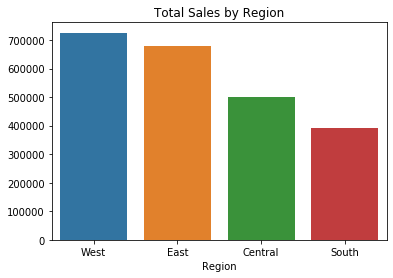

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Sales by Region
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
sns.barplot(x=region_sales.index, y=region_sales.values)
plt.title("Total Sales by Region")
plt.show()

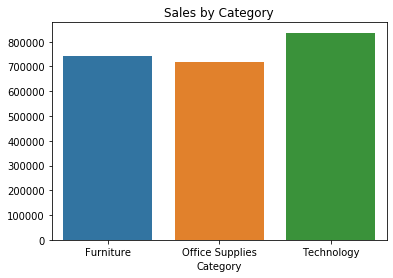

In [5]:
# 2. Sales by Category
category_sales = df.groupby('Category')['Sales'].sum()
sns.barplot(x=category_sales.index, y=category_sales.values)
plt.title("Sales by Category")
plt.show()

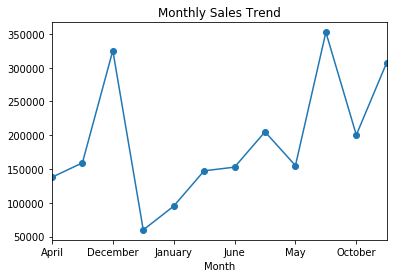

In [9]:
# 3. Monthly Sales Trend
monthly_sales = df.groupby('Month')['Sales'].sum()
monthly_sales.plot(kind='line', marker='o', title="Monthly Sales Trend")
plt.show()

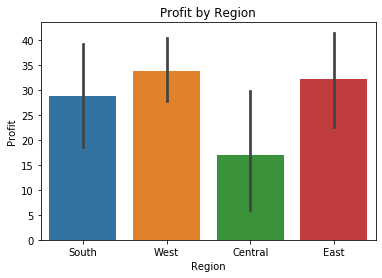

In [10]:
# 4. Profit by Region
sns.barplot(x='Region', y='Profit', data=df)
plt.title("Profit by Region")
plt.show()

In [2]:
#Key Metrics Summary 

import pandas as pd

# Reload dataset
df = pd.read_csv("Superstore.csv", encoding='latin1')

# KPI summary
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
profit_margin = (total_profit / total_sales) * 100
avg_discount = df['Discount'].mean()

print("Total Sales: ${:,.2f}".format(total_sales))
print("Total Profit: ${:,.2f}".format(total_profit))
print("Average Discount: {:.2f}%".format(avg_discount * 100))
print("Profit Margin: {:.2f}%".format(profit_margin))


Total Sales: $2,297,200.86
Total Profit: $286,397.02
Average Discount: 15.62%
Profit Margin: 12.47%


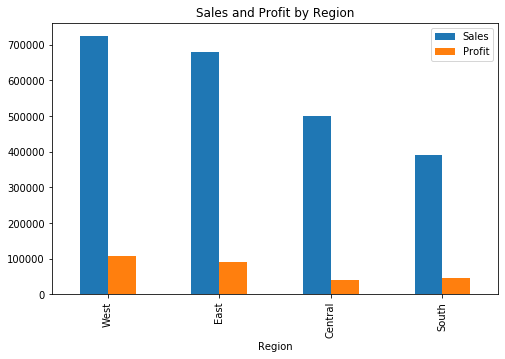

In [3]:
# Regional Sales and Profit Analysis

import matplotlib.pyplot as plt

region_sales = df.groupby('Region')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)
region_sales.plot(kind='bar', figsize=(8,5), title='Sales and Profit by Region')
plt.show()


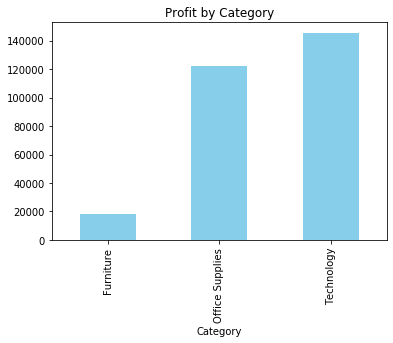

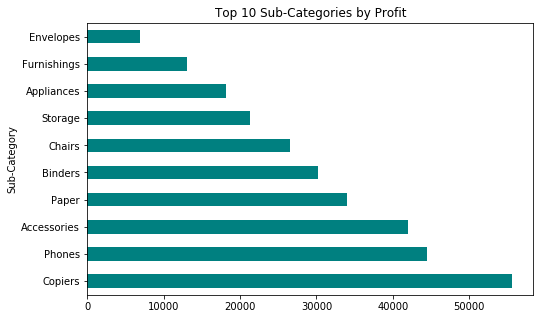

In [4]:
# Category and Sub-Category Analysis

cat_profit = df.groupby('Category')['Profit'].sum()
cat_profit.plot(kind='bar', title='Profit by Category', color='skyblue', figsize=(6,4))
plt.show()

subcat_profit = df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False).head(10)
subcat_profit.plot(kind='barh', title='Top 10 Sub-Categories by Profit', color='teal', figsize=(8,5))
plt.show()


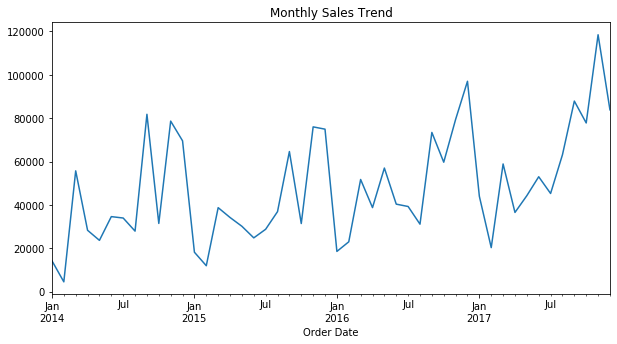

In [5]:
# Monthly Sales Trend

df['Order Date'] = pd.to_datetime(df['Order Date'])
monthly_sales = df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum()
monthly_sales.plot(kind='line', figsize=(10,5), title='Monthly Sales Trend')
plt.show()


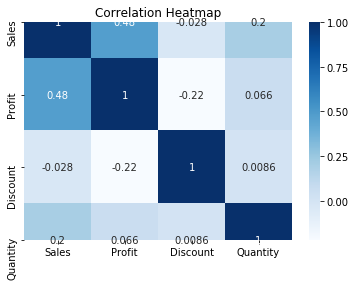

In [6]:
# Correlation Heatmap

import seaborn as sns

sns.heatmap(df[['Sales', 'Profit', 'Discount', 'Quantity']].corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()


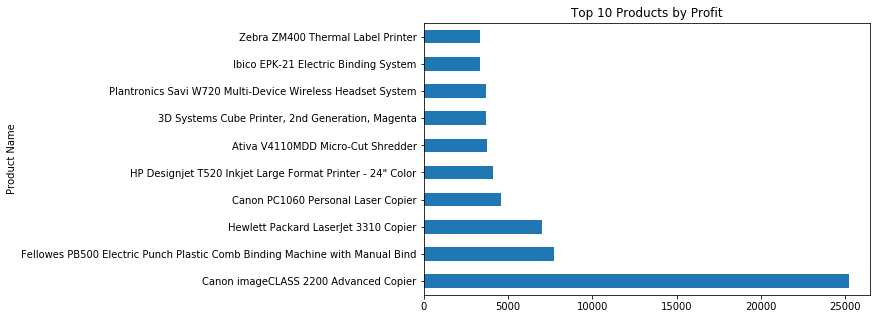

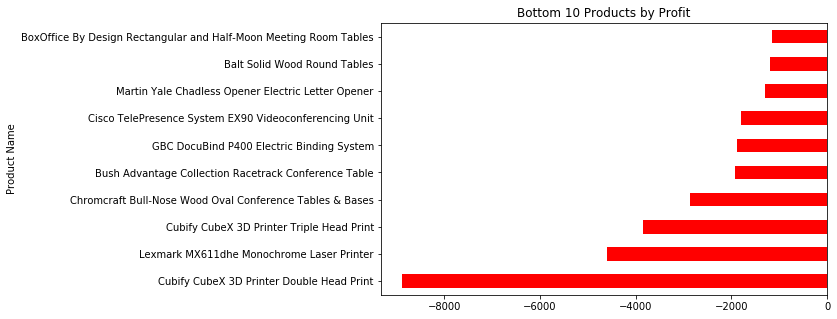

In [24]:
# Top and Bottom Performing Products

top_products = df.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='barh', title='Top 10 Products by Profit', figsize=(8,5))
plt.show()

bottom_products = df.groupby('Product Name')['Profit'].sum().sort_values().head(10)
bottom_products.plot(kind='barh', color='red', title='Bottom 10 Products by Profit', figsize=(8,5))
plt.show()


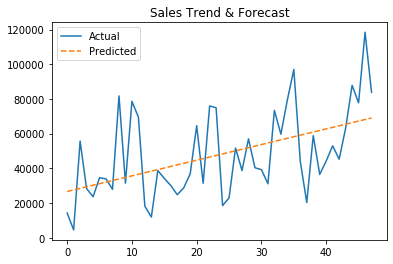

In [23]:
#  Simple Sales Forecast Using Linear Regression

from sklearn.linear_model import LinearRegression
import numpy as np

df_month = df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum().reset_index()
df_month['Month'] = np.arange(len(df_month))

model = LinearRegression()
model.fit(df_month[['Month']], df_month['Sales'])

pred = model.predict(df_month[['Month']])
plt.plot(df_month['Month'], df_month['Sales'], label='Actual')
plt.plot(df_month['Month'], pred, label='Predicted', linestyle='--')
plt.legend()
plt.title('Sales Trend & Forecast')
plt.show()


In [ ]:
# Key Insights & Conclusion
1.West region shows the highest sales and profit.
2.Technology category is the most profitable.
3.Discounts negatively correlate with profit.
4.Sales increase during the last quarter of the year.
5.Predictive model indicates steady sales growth.